In [1]:
import pandas as pds
import numpy as npy
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pds.read_csv('D:\password-strength\data.csv', error_bad_lines = False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [6]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [ ]:
# 0 - poor
# 2 - strong
# 1 - normal

In [7]:
data.isna().sum()   #how many has NaN value

password    1
strength    0
dtype: int64

In [8]:
data[data['password'].isnull()]    # what's inside first '[]' is the filter

,password,strength
367579,NaN,0


In [9]:
# drop it
data.dropna(inplace = True)

In [10]:
data.isnull().sum()

password    0
strength    0
dtype: int64

<AxesSubplot:xlabel='strength', ylabel='count'>

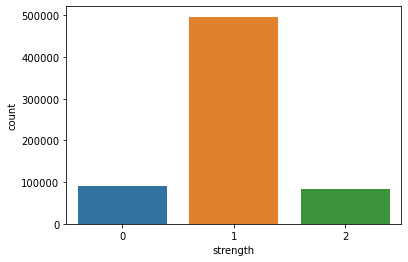

In [11]:
sb.countplot(data['strength'])

In [ ]:
# 1 has the highest count, imbalanced dataset     
#strength is a dependent feature. Separate them

In [12]:
password_tuple = npy.array(data)

In [13]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [ ]:
# shuffle the data so it provides robustness to the model

In [14]:
import random
random.shuffle(password_tuple)

In [15]:
#separation
x = [labels[0] for labels in password_tuple]
y = [labels[1] for labels in password_tuple]

In [16]:
x    #all passwords

['kzde5577',
 'kino3434',
 'kino3434',
 'kino3434',
 'megzy123',
 'lamborghin1',
 'lamborghin1',
 'kino3434',
 'AVYq1lDE4MgAZfNt',
 'kzde5577',
 'u6c8vhow',
 'v1118714',
 'v1118714',
 'kino3434',
 'as326159',
 'universe2908',
 '612035180tok',
 'jerusalem393',
 'universe2908',
 'AVYq1lDE4MgAZfNt',
 'g067057895',
 'asv5o9yu',
 'jerusalem393',
 'asv5o9yu',
 'WUt9IZzE0OQ7PkNE',
 'idofo673',
 'intel1',
 'intel1',
 'u6c8vhow',
 'asv5o9yu',
 'gaymaids1',
 '6975038lp',
 'faranumar91',
 '0169395484a',
 'AVYq1lDE4MgAZfNt',
 'jerusalem393',
 'lamborghin1',
 '6975038lp',
 '612035180tok',
 'jerusalem393',
 'visi7k1yr',
 'lamborghin1',
 'kzde5577',
 'megzy123',
 'exitos2009',
 'schalke04',
 'cigicigi123',
 'lamborghin1',
 'fahad123',
 'TyWM72UNEex8Q8Y',
 'jerusalem393',
 'v1118714',
 'g067057895',
 'fk9qi21m',
 'kino3434',
 'memjan123',
 'jytifok873',
 'olmaz.',
 'ok>bdk',
 'openup12',
 'kino3434',
 'g067057895',
 'lamborghin1',
 'lamborghin1',
 'prisonbreak1',
 'exitos2009',
 'calcifer32',
 'faranu

In [ ]:
# TF-IDF

In [28]:
def word_divide_char(inputs):
    character = []                  
    for i in inputs:                # password data gets split into single chars
        character.append(i)
    return character

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer = TfidfVectorizer(tokenizer = word_divide_char)

In [31]:
X = vectorizer.fit_transform(x)

In [32]:
X.shape

(669639, 136)

In [ ]:
# number of cols increased as now it is in the form of a vector.

In [33]:
vectorizer.get_feature_names()

['\x05',
 '\x06',
 '\x08',
 '\x0f',
 '\x10',
 '\x11',
 '\x13',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¤',
 '¦',
 '§',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '¼',
 '¾',
 '¿',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'í',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '—',
 '‚',
 '‡',
 '…',
 '‹',
 '›']

In [34]:
first_doc_vector = X[0]
first_doc_vector

<1x136 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [35]:
first_doc_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.5669214 ],
        [0.        ],
        [0.59185677],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [ ]:
#prepare data for model

In [38]:
df = pds.DataFrame(first_doc_vector.T.todense(), index = vectorizer.get_feature_names(), columns = ['TF-IDF'])
df.sort_values(by = ['TF-IDF'], ascending = False)

,TF-IDF
7,0.591857
5,0.566921
z,0.335729
k,0.292069
d,0.285536
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


In [ ]:
# pass data

In [ ]:
# apply logistic Regression (ML Algo)

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  #returns 4 param
# test size - here-20% of data is for testing and 80% for training.

In [42]:
X_train.shape

(535711, 136)

In [ ]:
# 53571 is somewhere close to 80 percent.

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf = LogisticRegression(random_state = 0, multi_class = 'multinomial')
# multinomial class is considered because we have 3 categories (0, 1, 2) 

In [45]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [ ]:
# now it's time for predictions....!

In [46]:
dt = npy.array(['@#123abcd'])
predc = vectorizer.transform(dt)
clf.predict(predc)

array([2])

In [47]:
y_predc = clf.predict(X_test)
y_predc      # all predictions in the form of array.

array([1, 1, 0, ..., 1, 0, 1])

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [49]:
cm = confusion_matrix(y_test, y_predc)
print(cm)
print(accuracy_score(y_test, y_predc))

[[ 5271 12654    19]
 [ 3883 92798  2616]
 [   36  5122 11529]]
0.8183352248969595


In [ ]:
 # 5271 92798 11529 are true predictions, 
    #0.8183352248969595 shows that model has an accuracy of approx 82 percent

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predc))

              precision    recall  f1-score   support

           0       0.57      0.29      0.39     17944
           1       0.84      0.93      0.88     99297
           2       0.81      0.69      0.75     16687

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928

